In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import tree, model_selection, ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data = pd.read_csv('./match_features.csv', index_col = 0)
data = pd.read_csv('/content/drive/My Drive/CS3244/data/match_features.csv', index_col = 0)
data.columns

Index(['MP', 'FG_AVG', 'FGA_AVG', 'FG%_AVG', '2P_AVG', '2PA_AVG', '2P%_AVG',
       '3P_AVG', '3PA_AVG', '3P%_AVG', 'FT_AVG', 'FT%_AVG', 'PTS_AVG',
       'FG.1_AVG', 'FGA.1_AVG', 'FG%.1_AVG', '2P.1_AVG', '2PA.1_AVG',
       '2P%.1_AVG', '3P.1_AVG', '3PA.1_AVG', '3P%.1_AVG', 'FT.1_AVG',
       'FTA.1_AVG', 'FT%.1_AVG', 'PTS.1_AVG', 'FG_players_AVG',
       'FGA_players_AVG', 'FG%_players_AVG', '3P_players_AVG',
       '3PA_players_AVG', '3P%_players_AVG', 'FT_players_AVG',
       'FT%_players_AVG', 'ORB_players_AVG', 'DRB_players_AVG',
       'TRB_players_AVG', 'AST_players_AVG', 'STL_players_AVG',
       'BLK_players_AVG', 'TOV_players_AVG', 'PF_players_AVG',
       'PTS_players_AVG', '+/-_players_AVG', 'TS%_players_AVG',
       '3PAr_players_AVG', 'FTr_players_AVG', 'ORB%_players_AVG',
       'DRB%_players_AVG', 'TRB%_players_AVG', 'AST%_players_AVG',
       'STL%_players_AVG', 'BLK%_players_AVG', 'TOV%_players_AVG',
       'USG%_players_AVG', 'ORtg_players_AVG', 'DRtg_players_AVG',


In [ ]:
data.head()

MP  FG_AVG  FGA_AVG  FG%_AVG  ...  BPM_players_AVG   A/T_AVG  FG_AVG_AVG  y
0   0    -1.4      2.6  -0.0302  ...        -1.159788 -0.315775    0.976896  1
1   0    -4.1    -14.2   0.0274  ...        -0.067360 -0.451256   -3.010764  0
2   0     2.4      2.0   0.0150  ...        -0.561669 -0.132743    0.644868  1
3   0     2.6     -1.2   0.0361  ...         0.341002 -0.400132    1.348361  0
4   0     0.4     -0.5   0.0062  ...        -0.539127  0.054787   -1.667778  1

[5 rows x 61 columns]

In [ ]:
data = data.dropna()

In [ ]:
X = data.drop(columns = ['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=12)

In [ ]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((912, 60), (115, 60), (115, 60), (912,), (115,), (115,))

In [ ]:
df_train = X_train.join(y_train)
df_val = X_val.join(y_val)
df_test = X_test.join(y_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# set a random seed
import random
random.seed(3244)

## using default parameter

In [ ]:
base_forest = RandomForestClassifier()
base_forest.fit(X_train, y_train)

y_train_pred = base_forest.predict(X_train)
y_pred = base_forest.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 1.0
Test accuracy 0.5826086956521739


## parameter tuning

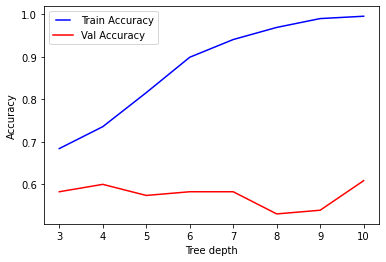

In [ ]:
# Tune max_depth
max_depths = np.linspace(3, 10, 8, endpoint=True)
train_results = []
val_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = accuracy_score(y_train, train_pred)
   train_results.append(train_acc)

   y_pred = rf.predict(X_val)
   val_acc = accuracy_score(y_val, y_pred)
   val_results.append(val_acc)
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results, 'r', label='Val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

## max_depth = 4

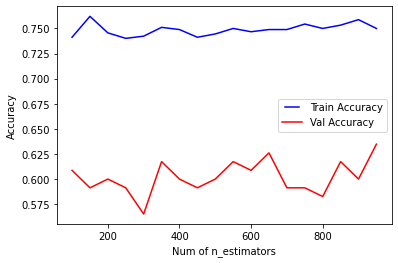

In [ ]:
# Tune n_estimator
n_estimators = np.arange(100,1000,50)
train_results = []
val_results = []
for n_estimator in n_estimators:
   rf = RandomForestClassifier(max_depth=4, n_estimators = n_estimator )
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = accuracy_score(y_train, train_pred)
   train_results.append(train_acc)

   y_pred = rf.predict(X_val)
   val_acc = accuracy_score(y_val, y_pred)
   val_results.append(val_acc)
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(n_estimators, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, val_results, 'r', label='Val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Num of n_estimators')
plt.show()

# n_estimators = 650

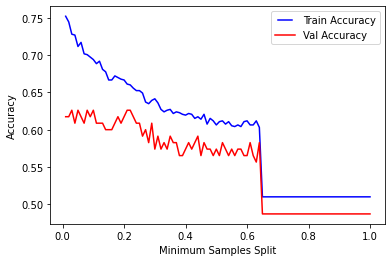

In [ ]:
# tune min_sample_split
min_sample_splits = np.linspace(0.01, 1, 100, endpoint=True)
train_results = []
val_results = []
for min_sample_split in min_sample_splits:
   rf = RandomForestClassifier(max_depth = 4, n_estimators = 650, min_samples_split=min_sample_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = accuracy_score(y_train, train_pred)
   train_results.append(train_acc)

   y_pred = rf.predict(X_val)
   val_acc = accuracy_score(y_val, y_pred)
   val_results.append(val_acc)
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(min_sample_splits, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_sample_splits, val_results, 'r', label='Val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Split')
plt.show()
# 0.2

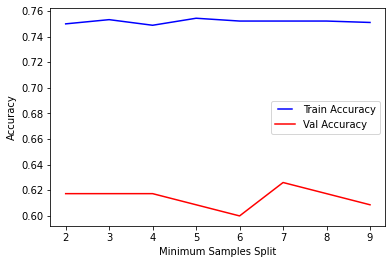

In [ ]:
min_sample_splits = np.arange(2,10,1)
train_results = []
val_results = []
for min_sample_split in min_sample_splits:
   rf = RandomForestClassifier(max_depth = 4, n_estimators = 650, min_samples_split=min_sample_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = accuracy_score(y_train, train_pred)
   train_results.append(train_acc)

   y_pred = rf.predict(X_val)
   val_acc = accuracy_score(y_val, y_pred)
   val_results.append(val_acc)
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(min_sample_splits, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_sample_splits, val_results, 'r', label='Val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Split')
plt.show()

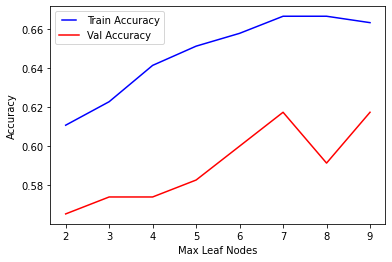

In [ ]:
# tune max_leaf_nodes
max_leaf_nodes = np.arange(2,10,1)
train_results = []
val_results = []
for max_leaf_node in max_leaf_nodes:
   rf = RandomForestClassifier(max_depth = 4, n_estimators = 650, 
                               min_samples_split=0.2, max_leaf_nodes = max_leaf_node)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = accuracy_score(y_train, train_pred)
   train_results.append(train_acc)

   y_pred = rf.predict(X_val)
   val_acc = accuracy_score(y_val, y_pred)
   val_results.append(val_acc)
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(max_leaf_nodes, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_leaf_nodes, val_results, 'r', label='Val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.show()
# max_leaf_nodes = 7

In [ ]:
## build model
model = RandomForestClassifier(max_depth = 4, n_estimators = 650, min_samples_split=0.2, max_leaf_nodes = 7)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_valid = model.predict(X_val)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_validation = accuracy_score(y_val, y_valid)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Validation accuracy', accuracy_validation)
print('Test accuracy', accuracy_test)

Train accuracy 0.6611842105263158
Validation accuracy 0.5826086956521739
Test accuracy 0.6695652173913044


## Visualize the first 3 trees

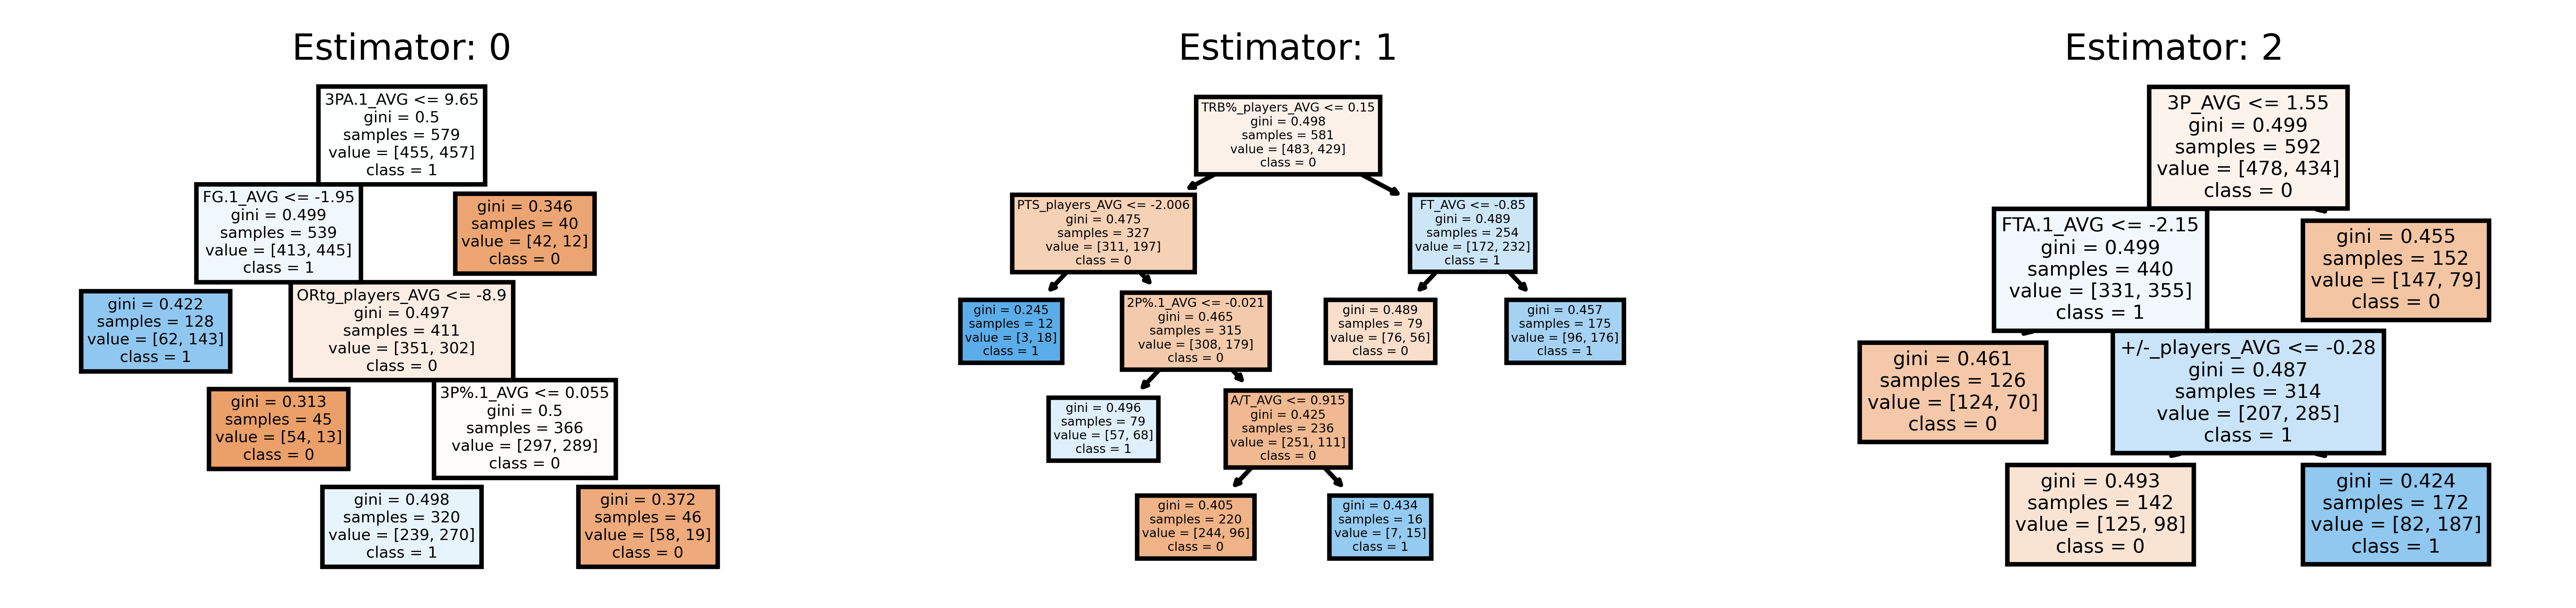

In [ ]:
fn = X.columns
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 8)

## Explain with LIME

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
X_test.head()

MP  FG_AVG  FGA_AVG  ...  BPM_players_AVG   A/T_AVG  FG_AVG_AVG
744   0     0.5     -6.6  ...        -0.300115 -0.350972    1.482833
820   0     2.5      3.9  ...        -0.879545  1.475118   -2.908458
802   0    -3.7     -3.8  ...        -0.337835 -0.011951   -1.901389
103   0    -1.8     -4.0  ...        -0.504139  0.173637    0.263764
891   0     5.6      2.1  ...         0.369867  1.102805   -2.136118

[5 rows x 60 columns]

In [ ]:
predict_fn_rf = lambda x: model.predict_proba(x).astype(float)
# Get the explanation for RandomForest
choosen_instance = X_test.loc[[744]].values[0]
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names = X_train.columns, 
                                                   class_names=[0, 1], discretize_continuous=True)

exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)


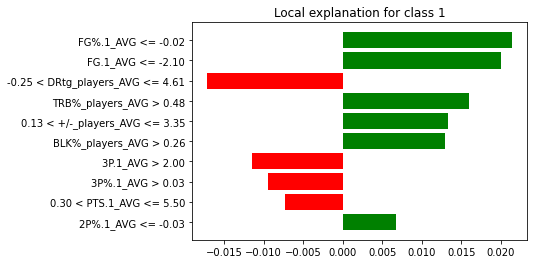

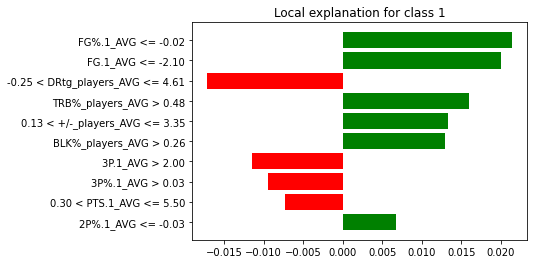

In [ ]:
exp.as_pyplot_figure()

## using grid search

In [ ]:
 forest = RandomForestClassifier()

params = {
            'n_estimators': [100, 300, 500, 1000],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [4, 5, 6]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, 
                      n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  6.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('best parameters: ', rf.best_params_)

best parameters:  {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
y_valid = rf.predict(X_val)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_validation = accuracy_score(y_val, y_valid)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Validation accuracy', accuracy_validation)
print('Test accuracy', accuracy_test)


Train accuracy 0.9868421052631579
Validation accuracy 0.5652173913043478
Test accuracy 0.5826086956521739


### (BO) Parameter tuning to alleviate overfitting


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [ ]:
#Bayesian optimization
def bayesian_optimization(dataset, function, parameters):
   X_train, y_train, X_test, y_test = dataset
   n_iterations = 5
   gp_params = {"alpha": 1e-4}

   BO = BayesianOptimization(function, parameters)
   BO.maximize(n_iter=n_iterations, **gp_params)

   return BO.max

In [ ]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="accuracy",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [ ]:
#Train model
def train(X_train, y_train, X_test, y_test, function, parameters):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 4
    
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model

In [ ]:
function, parameters = rfc_optimization(3)
model = train(X_train, y_train, X_test, y_test, function, parameters)

In [ ]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

## Manual Tuning

In [ ]:
model = RandomForestClassifier(max_depth = 3, min_samples_leaf = 3, 
                                min_samples_split = 5, n_estimators=350)
model.fit(X_train, y_train)

In [ ]:
model = RandomForestClassifier(max_depth = 3, min_samples_leaf = 4, 
                                min_samples_split = 5, n_estimators=400)
model.fit(X_train, y_train)

In [ ]:
model = RandomForestClassifier(max_depth = 3, min_samples_leaf = 5, 
                                min_samples_split = 5, n_estimators=400)
model.fit(X_train, y_train)

In [ ]:
model = RandomForestClassifier(max_depth = 3, min_samples_leaf = 5, 
                                min_samples_split = 5, n_estimators=400)
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_valid_pred = model.predict(X_val)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_validation = accuracy_score(y_val, y_valid_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)
print('Validation accuracy', accuracy_validation)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(objective = "binary:logistic")

params = {
            'eta': np.arange(0.01, 0.2, 0.05),
            'min_child_weight': np.arange(1, 2, 0.5).tolist(),
            'gamma': [0, 1, 2],
            'subsample': np.arange(0.3, 0.6, 0.1).tolist(),
            'colsample_bytree': np.arange(0.1, 0.5, 0.1).tolist(),
            'max_depth': [4, 5, 6]
        }

skf = StratifiedKFold(n_splits=10, shuffle = True)
xgb = GridSearchCV(xgb_model, 
                    param_grid = params,  
                    n_jobs = -1, 
                    cv = skf.split(X_train, y_train),
                    refit = "accuracy_score")

xgb.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x12050bcf0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             

In [1]:
print('best parameters: ', xgb.best_params_)

In [ ]:
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.7360350492880613
Test accuracy 0.6681222707423581


## plot log loss and classification error

In [ ]:
model = XGBClassifier(colsample_bytree = 0.3, eta=0.01, gamma=2, max_depth=4,
                      min_child_weight=1.5, subsample=0.3)

https://blog.csdn.net/lujiandong1/article/details/52777168

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

[0]	validation_0-error:0.38116	validation_0-logloss:0.69207	validation_1-error:0.46725	validation_1-logloss:0.69293
[1]	validation_0-error:0.36802	validation_0-logloss:0.69121	validation_1-error:0.48908	validation_1-logloss:0.69228
[2]	validation_0-error:0.36473	validation_0-logloss:0.69032	validation_1-error:0.43668	validation_1-logloss:0.69137
[3]	validation_0-error:0.35707	validation_0-logloss:0.68933	validation_1-error:0.37991	validation_1-logloss:0.69059
[4]	validation_0-error:0.34611	validation_0-logloss:0.68821	validation_1-error:0.37555	validation_1-logloss:0.69027
[5]	validation_0-error:0.34502	validation_0-logloss:0.68730	validation_1-error:0.42795	validation_1-logloss:0.68985
[6]	validation_0-error:0.33735	validation_0-logloss:0.68634	validation_1-error:0.40611	validation_1-logloss:0.68975
[7]	validation_0-error:0.32968	validation_0-logloss:0.68534	validation_1-error:0.40175	validation_1-logloss:0.68938
[8]	validation_0-error:0.32749	validation_0-logloss:0.68431	validation_1

[71]	validation_0-error:0.27492	validation_0-logloss:0.63765	validation_1-error:0.33625	validation_1-logloss:0.66305
[72]	validation_0-error:0.27054	validation_0-logloss:0.63695	validation_1-error:0.33625	validation_1-logloss:0.66335
[73]	validation_0-error:0.26506	validation_0-logloss:0.63635	validation_1-error:0.32751	validation_1-logloss:0.66279
[74]	validation_0-error:0.26506	validation_0-logloss:0.63547	validation_1-error:0.34498	validation_1-logloss:0.66250
[75]	validation_0-error:0.26177	validation_0-logloss:0.63485	validation_1-error:0.33625	validation_1-logloss:0.66219
[76]	validation_0-error:0.26944	validation_0-logloss:0.63399	validation_1-error:0.33625	validation_1-logloss:0.66164
[77]	validation_0-error:0.26725	validation_0-logloss:0.63343	validation_1-error:0.33625	validation_1-logloss:0.66172
[78]	validation_0-error:0.27163	validation_0-logloss:0.63305	validation_1-error:0.34061	validation_1-logloss:0.66100
[79]	validation_0-error:0.27382	validation_0-logloss:0.63230	val

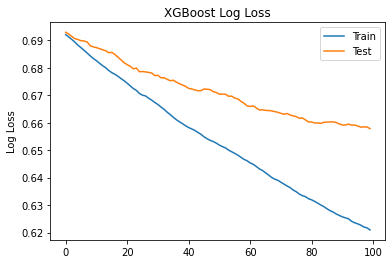

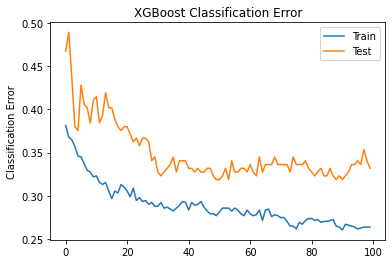

In [ ]:
from matplotlib import pyplot

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## Explain with LIME

In [ ]:
X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
X_test_arr = np.array(X_test)
y_test_arr = np.array(y_test)

In [ ]:
model = XGBClassifier(colsample_bytree = 0.3, eta=0.01, gamma=2, max_depth=4,
                      min_child_weight=1.5, subsample=0.3)

model.fit(X_train_arr, y_train_arr)

y_train_pred = model.predict(X_train_arr)
y_pred = model.predict(X_test_arr)
accuracy_train = accuracy_score(y_train_arr, y_train_pred)
accuracy_test = accuracy_score(y_test_arr, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.7360350492880613
Test accuracy 0.6681222707423581


https://zhuanlan.zhihu.com/p/193152643

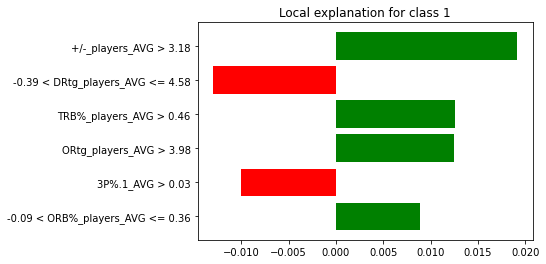

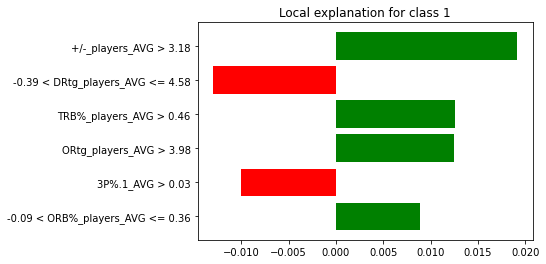

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_arr, feature_names=X_columns,
                                                   class_names=[0,1], discretize_continuous=True)


exp = explainer.explain_instance(X_test_arr[0], model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True, show_all=True)
exp.as_pyplot_figure()